# Linear Regression

__Linear Equation__
\begin{equation}
y = m*x + c
\end{equation}


__Cost Function__
\begin{equation}
\begin{aligned}
J = \frac{1}{n} \cdot\sum_{i=1}^{n} (y_{real} - y_{pred})^2 \\
J(m,c) = \frac{1}{n} \cdot\sum_{i=1}^{n} (y_i - (m \cdot x_i +c) )^2
\end{aligned}
\end{equation}


__Partial derivative of cost function__
\begin{equation}
\begin{aligned}
\frac{\partial J}{\partial m} = \frac{1}{n} \cdot \sum_{i=0}^{n}2 \cdot(y_i - (m \cdot x_i +c) ) \cdot (-x_i) \\
\frac{\partial J}{\partial c} = \frac{1}{n} \cdot \sum_{i=0}^{n}2 \cdot(y_i - (m \cdot x_i +c) ) \cdot (-1)
\end{aligned}
\end{equation}


__Gradient Descent with learning rate__

\begin{equation}
\begin{aligned}
m = m_{now} - lr \cdot \frac{\partial J}{\partial m} \\
c = c_{now} - lr \cdot \frac{\partial J}{\partial c}
\end{aligned}
\end{equation}


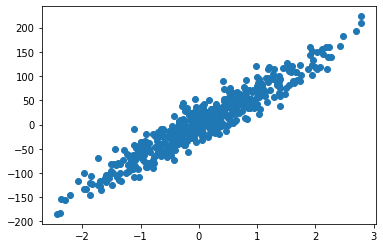

(500, 1)

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn import datasets

x,y = datasets.make_regression(n_samples=500, n_features=1, noise=20, random_state=4)

plt.scatter(x,y)
plt.show()
x.shape 

In [3]:
class LinearRegression():

    def __init__ (self, epochs=10000, lr=0.001):

        self.epochs = epochs
        self.lr = lr 
        self.w = None
        self.b = None

    def fit(self, x, y):

        n_samples, n_features = x.shape 

        # intialize w and b
        self.w = np.zeros(n_features)
        self.b = 0

        # loss 
        losses = []

        for epoch in range(self.epochs):

            # dot product
            y_pred = np.dot(x, self.w.T) + self.b

            # loss, RootMeanSquare
            loss = np.sqrt(np.mean(y_pred - y)**2)

            # append the loss
            losses.append(loss)

            # gradient descent
            dw = (-2/n_samples)*np.dot((y - y_pred).T, x)
            db = (-2/n_samples)*np.sum(y - y_pred)


            # update w, b 
            self.w = self.w - self.lr*dw
            self.b = self.b - self.lr*db 

            if epoch%1000 == 0:
                print(f'Epochs:{epoch}, loss:{loss}')
                
        return losses


    def predict(self,x):

        # dot product
        y_pred = np.dot(x, self.w) + self.b 

        return y_pred  

Epochs:0, loss:5.484698593859862
Epochs:1000, loss:0.5536504793332572
Epochs:2000, loss:0.2737199929432627
Epochs:3000, loss:0.06812901384479261
Epochs:4000, loss:0.014160300905339056
Epochs:5000, loss:0.002711893513007851
Epochs:6000, loss:0.000496467700350081
Epochs:7000, loss:8.842814528560439e-05
Epochs:8000, loss:1.5473762606802667e-05
Epochs:9000, loss:2.67574914977331e-06


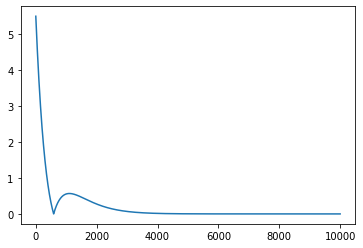

In [4]:
linear = LinearRegression()

losses = linear.fit(x,y)
plt.plot(range(10000), losses)
plt.show()

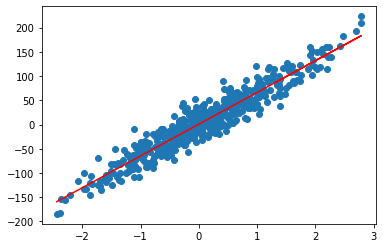

In [5]:
y_pred = linear.predict(x)

plt.scatter(x,y)
plt.plot(x,y_pred, 'r')
plt.show()